# Memristor, modellering og anvendelse
## Opprinnelse og Introduksjon
I 1971 teoretisere Professor Leon Chua at det var en manglende, passiv elektrisk komponponent. Motstander knytter sammen spenning og strøm, kondensatorer knytter sammen spenning og ladning og spoler knytter sammen flux og strøm. Derfor teoretiserte han at det var et 4. element som knyttet sammen flux og ladning. 

En memristor skulle være en ulineær, passiv toterminals elektrisk komponent som “koblet sammen” elektrisk ladning og magnetisk flux, men dag bruker vi begrepet om alle former for ikke-volatilt minne som er basert på endring i motstand som øker "flyten" av strøm i en retning og minsker den i den andre.

Ordet memristor er satt sammen av de engelske ordene “memory” og “resistor”. Dette forklarer ganske bra hvordan den fungerer. En memristor kan “huske” sin forrige tilstand og endre egenskapene sine basert på strømmen den får gjennom seg. 

Ved å bestemme motstanden i memristoren kan du videre bruke dette som en form for lagring. For eksempel høy motstand for "0" og lav motstand for "1". Siden memristoren husker denne tilstanden og ikke den ikke er avhengig av en strømkilde for å holde på tilstanden, er dette minnet ikke-volatilt. Memristorer er derfor en lovende kandidat å bruke i minnet til datamaskiner og er et bra alternativ til volitalt, fast-minne.

I denne oppgaven skal jeg forsøke å modellere en memristor og responsen den har til en sinusbølge. I oppgaven skal jeg prøve å modellere både en lineær, og en ikke-lineær modell av en memristor.


## fysisk oppbygning
Den første fungerende memristoren ble ikke laget før i 2008 av R. Stanley Williams ved HP-labs. Williams-memristoren består av 2 elektroder i metall separert av en tynn film med titandioksid.

I sin naturlige form er titandioksid en elektrisk isolator med veldig høy motstand. Memristoren beholder deler av titandioksid som en isolator, mens resten av titandioksid er 'dopet' ved å begrense mengden oksygen materialet har tilgjengelig. den dopede titandioksid har mye mindre motstand enn den har i naturlig form.

Strømmen som går gjennom filmen med titandioksid beveger for det meste via "hullene" som er etterlatt av de manglende oksygenatomene. Elektronene er negativt ladet og vil bli tiltrukket av den positive terminalen og frastøtt fra den negative og gå med strømmens retning som i alle andre komponenter. 

Mens dette skjer, vil det også skje en annen reaksjon, denne reaksjonen er i det som gjør at memristoren har de egenskapene den har og kan "huske" den forrige tilstanden den var i. Om du ser på de manglene oksygenatomene som "hull", kan du regne med disse som om de har en positiv ladning og vil trekkes mot den negative terminalen. Forflytningen av hullene krever en forandring i strukturen til hele atomet og går derfor mye tregere enn elektronenes bevegelse. Forflyttelsen av disse atomene vil endre grensen mellom det dopede og det udopede laget i filmen med titandioksid.

På bildet under ser du en illustrasjon av hvordan filmens struktur er:

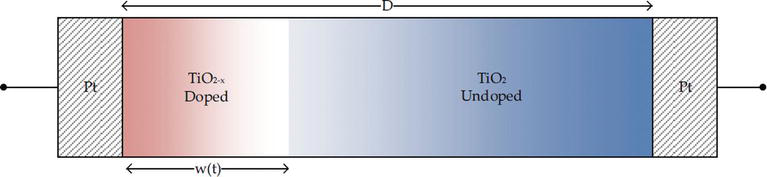

## Lineær modellering
Motstanden til en memrisitor kalles memresistans. Memresistansen kan finnes på flere måter, og har også en formel tilstande Ohm's lov: 

#### $\\m=\frac{d\phi}{dq}$

Hvor $\phi$ er flux og $q$ er ladningen.

For en memristor er det flere variabler som spiller inn den egenskaper. $R_{på}$ er motstanden av den dopede delen, $R_{av}$ er motstanden til den udopede delen, $\mu$ er "drift-mobilitien", eller farten materialet i filmen kan endre tilstand, $D$ er den totale tykkelsen av det filmen, $w$ er hvor mye av filmen som er dopet og $x$ som regnes ved $x=w/D$.

Spenningskilden jeg skal brukee til simuleringer er en sinusbølge. Formlene jeg bruker fra testingen modellering utført i HP-labs. Formlene jeg har brukt for å finne de forskjellige verdiene er:

$x(t)\rightarrow \frac{w(t)}{D}$, forholdet mellom lengden og den dopede delen, er 0<x<1

$I(t)\rightarrow \frac{v(t)}{m(t)}$, Ohms lov

$m(t)\rightarrow r_{på}\times x(t)+r_{av}\times (1-x(t))$, bruker tykkelsen på den dopede til å bestemme motstanden

$w(t)\rightarrow \int_{0}^{t}{\frac{\mu\times r_{på}\times i(t)}{D}}dt+w(t-1)$, formel tatt fra kilder

$q(t)\rightarrow \int_{0}^{t}i\space dt$, integralet av strømmen

$\phi(t)\rightarrow m\times q$, omstokket formlen for memresistans

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class lin_memristor:
    def __init__(self, r_på, r_av, w_0, D, mu, v_max=1,f=1, time=2):
        self.r_på=r_på
        self.r_av=r_av
        self.w_0=w_0
        self.D=D
        self.mu=mu
        self.v_max=v_max
        self.f=f
        self.time=time
        
    def __call__(self):
        t=np.linspace(0,self.time,10001) #tid
        v=np.array(self.v_max*np.sin(t*2*np.pi*self.f)) #spenning i sinusbølger
        w=[self.w_0] #bredden på dopet område
        x=[self.w_0/self.D] #x
        i=[0] #strøm
        m=[self.r_på*(x[0])+self.r_av*(1-x[0])] #memresistans
        q=[0] #ladning
        flux=[0] #flux
        for j in range(len(t)-1):
            dt=t[j+1]-t[j]#delta t
            q.append(q[j]+i[j]*dt)
            flux.append(m[j]*(q[j]))
            x.append(w[j]/self.D)
            m.append(self.r_på*(x[j+1])+self.r_av*(1-x[j])) 
            i.append(v[j]/m[j])
            w_new=((self.mu*self.r_på*i[j])/self.D)*dt+w[j]
            if w_new>0 and w_new<self.D: #sørger for at 0<w<D
                w.append(((self.mu*self.r_på*i[j])/self.D)*dt+w[j]) 
            elif w_new<=0:
                w.append(0)
            else:
                w.append(self.D)       
        self.m=m
        self.v=v
        self.i=i
        self.w=w
        self.x=x
        self.t=t
        self.q=q
        self.flux=flux

In [3]:
def plot(x, y, x_label=None, y_label=None, title=None, labels=None):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if labels!=None:
        for i in range(len(x)):
            plt.plot(x[i],y[i],label=labels[i])
    else:
        for i in range(len(x)):
            plt.plot(x[i],y[i])
    plt.legend()
    plt.show()

In [4]:
def compare(x,y1,y2,x_label=None, y_labels=None, title=None):
    fig, ax1 = plt.subplots()
    
    plt.title(title)
    color = 'tab:red'
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_labels[0], color=color)
    ax1.plot(x, y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  

    color = 'tab:blue'
    ax2.set_ylabel(y_labels[1], color=color)  
    ax2.plot(x, y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.show()

### Verdier valgt for modell
Verdiene jeg velger å bruke er fra Williams-memristoren fra hp labs. Verdiene som er basert på Titandioksiden er som følger,  $R_{av}=16000\Omega$, $R_{på}=100\Omega$, $w_0=3nm$, $D=10nm$, $\mu=10^{-14}m^2S^{-1}V^{-1}$.

for å studere dens egenskaper lager jeg 5 instanser av memristorer med forskjellige spenninger/frekvenser på sinusbølgen hvor hvor:

1. 1v, 1hz
2. 1v, 2hz
3. 1v 3hz
4. 0.8v, 1hz
5. 1,2v, 1hz

For eksemplene hvor det snakkes om egenskapene til memristorer generelt brukes figur 1.

In [5]:
lin_1v_1hz= lin_memristor(100,16000,3e-9,10e-9,1e-14,1,1,2)
lin_1v_1hz()
lin_1v_2hz= lin_memristor(100,16000,3e-9,10e-9,1e-14,1,2,2)
lin_1v_2hz()
lin_1v_3hz= lin_memristor(100,16000,3e-9,10e-9,1e-14,1,3,2)
lin_1v_3hz()
lin_08v_1hz= lin_memristor(100,16000,3e-9,10e-9,1e-14,0.8,1,2)
lin_08v_1hz()
lin_12v_1hz= lin_memristor(100,16000,3e-9,10e-9,1e-14,1.2,1,2)
lin_12v_1hz()

### Memresistans og X
Vi kan begynne å studere egenskapene til memristoren ved å se på figurene under. Memresistansen beveger seg linært med x, begge beveger seg i sinusbølger, men er 180 grader utav fase.

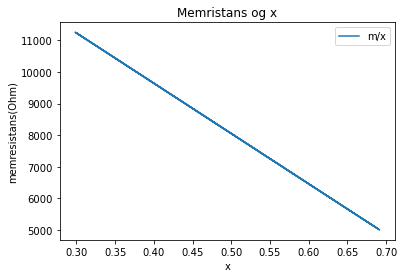

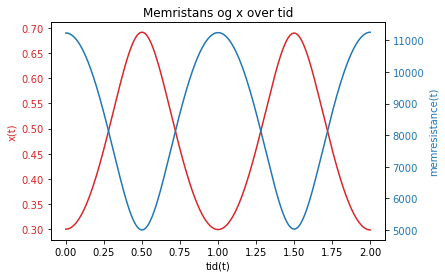

In [6]:
plot([lin_1v_1hz.x],[lin_1v_1hz.m],'x','memresistans(Ohm)', 'Memristans og x', ["m/x"])
compare(lin_1v_1hz.t,lin_1v_1hz.x,lin_1v_1hz.m,'tid(t)',['x(t)','memresistance(t)'], 'Memristans og x over tid')

### Fase mellom memresistans og spenning
Spenningen og memresistansen vil ikke være i fase ifølge ligningene våre ovenfor, memresistansen ligger 90 grader forran i fase. derfor vil ikke spenningen og strømmen ligge linært i forhold til hverandre.

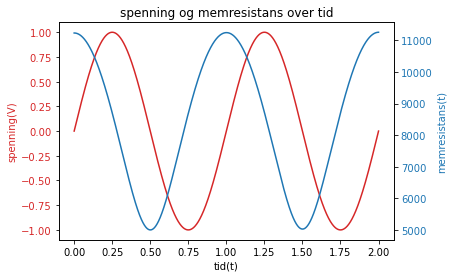

In [7]:
compare(lin_1v_1hz.t,lin_1v_1hz.v,lin_1v_1hz.m,'tid(t)',['spenning(V)','memresistans(t)'], 'spenning og memresistans over tid')

### Spenning og strøm
Spenningen vil  møte på en annen resistans der den har samme verdier på forskjellige punkter på kurven. Men strømmen er fortsatt bestemt av Ohms lov og vil derfor ligge i fase på topp-,bunn- og nullpunkter. Dette viser figurene under klart.

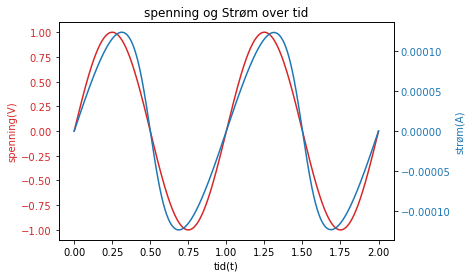

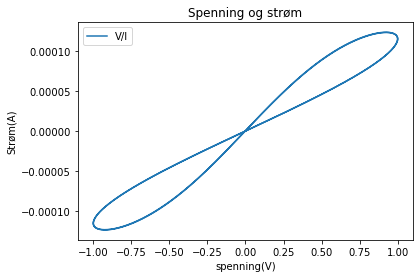

In [8]:
compare(lin_1v_1hz.t,lin_1v_1hz.v,lin_1v_1hz.i,'tid(t)',['spenning(V)','strøm(A)'], 'spenning og Strøm over tid')
plot([lin_1v_1hz.v],[lin_1v_1hz.i],'spenning(V)','Strøm(A)', 'Spenning og strøm', ["V/I"])

### Testing ved forskjellige frekvenser
Ved høyere frekvensen får materialet mindre tid til å "endre" på grensen og vil derfor ha mindre variasjon i motstanden. Dette vises igjenn på figuren under hvor det er større variasjon jo mindre frekvensen er.

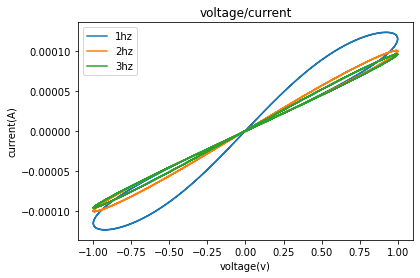

In [9]:
plot([lin_1v_1hz.v,lin_1v_2hz.v,lin_1v_3hz.v],[lin_1v_1hz.i,lin_1v_2hz.i,lin_1v_3hz.i],'voltage(v)','current(A)','voltage/current',["1hz","2hz",'3hz'])

### Testing ved forskjellige spenninger
Ved høyere spenningen vil det bli større sprik mellom motstandene den møter og større forskjell på verdiene. Figurene under viser dette klart.

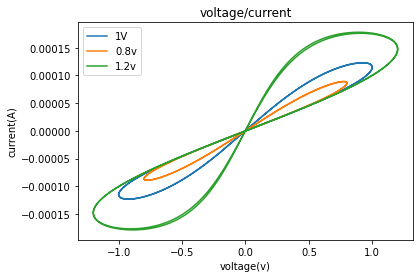

In [11]:
plot([lin_1v_1hz.v,lin_08v_1hz.v,lin_12v_1hz.v],[lin_1v_1hz.i,lin_08v_1hz.i,lin_12v_1hz.i],'voltage(v)','current(A)','voltage/current',["1V","0.8v",'1.2v'])

## Ikke-lineær modell
### Hvorfor en ulineær modell?
Den linære modellen er en simplifisert modell som er laget for å vise memristorens egenskaper. I modellen er x proporsjonal med ladningen gjennom memristoren og anntar at "Hullene" kan bevege seg gjennom hele filmen, dette stemmer ikke helt. Den dopede delen av filmen vil ikke kunne strekke seg over hele filmen, den vil heller ikke kunne forsvinne slik som den kan i den linære modellen.

Formlene vil da legges inn inn i funksjonen til w, slik at:

$\frac{dw}{dt}=\frac{\mu\times r_{på}\times I(t)}{D}\times f(x(t))$

### formler
Den vanligste og letteste måtes å løse dette problemet på er ved å bruke det som kalles for en window-funksjon $f(x)$, det denne funksjonen skal gjøre er:

- passe på at memristoren har en øvre og nedre grense på hvor mye eller lite av den som kan være dopet

- gjøre at x beveger seg ulinært i området i endring i komponenten

- inneholde kontrollparametere for å kunne tilpasse den best mulig

- alltid ligge i et intervall mellom 0<f(x)<1

Det finnes mange forskjellige formler for window-funksjoner, men 2 av de simpleste og mest brukte for memristorer er:

- Prodromakis:$f(x)=j(1-((x-0.5)^2+0.75)^p)$,  hvor j er et positivt flytall og p er et positivt heltall. 

- Joglekar:$f(x)=1-(2x-1)^{2p}$, hvor p er et positivt heltall.

Under er det skrevet en testfunksjon for å vise verdiene til funksjonene for vilkårlige verdier av x. For alle verdier av både j og p, ser man at begge funksjonene har høyestvekstfaktor mot midten og mindre mot sidene.

Resultatene viser at for våre modeller virker j=1 og p=10 mest hensiktsmessig i Prodromakis modellen, mens joglekarmodellen er mer fleksibel og gir likere resultater uansett p-verdi.

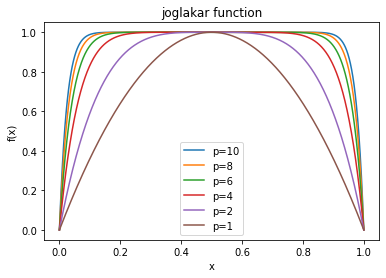

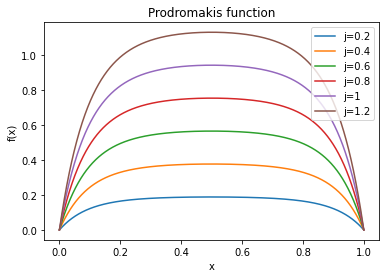

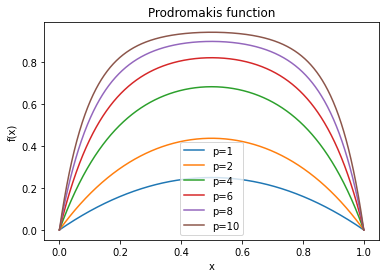

In [14]:
def test_joglakar(p):
    x=np.linspace(0,1,1001)
    f_p=[]
    for i in range(len(p)):
        f_p.append(np.array(1-(2*x-1)**(2*p[i])))
        plt.plot(x,f_p[i],label=f'p={p[i]}')
    plt.title('joglakar function')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend()
    plt.show()

test_joglakar([10,8,6,4,2,1])

def test_Prodromakis(p,j):
    x=np.linspace(0,1,1001)
    f_p=[]
    if type(j)==int:
        for i in range(len(p)):
            f_p.append(j*(1-((x-0.5)**2+0.75)**p[i]))
            plt.plot(x,f_p[i],label=f'p={p[i]}')
    else:
        for i in range(len(j)):
            f_p.append(j[i]*(1-((x-0.5)**2+0.75)**p))
            plt.plot(x,f_p[i],label=f'j={j[i]}')
    plt.title('Prodromakis function')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend()
    plt.show()

test_Prodromakis(10,[0.2,0.4,0.6,0.8,1,1.2])
test_Prodromakis([1,2,4,6,8,10],1)

In [15]:
class non_lin_memristor(lin_memristor):
    def _calculate(self, f_p0):
        t=np.linspace(0,self.time,10001)#tid
        v=np.array(self.v_max*np.sin(t*2*np.pi*self.f))#spenning i sinusbølger, f er frekvens og V_max toppunktene i spenningen
        w=[self.w_0]#bredden på dopet område
        x=[self.w_0/self.D]
        f_p=[f_p0(x[0])]
        i=[0]
        m=[self.r_på*(x[0])+self.r_av*(1-x[0])]
        q=[0]
        flux=[0]
        for j in range(len(t)-1):
            dt=t[j+1]-t[j]#delta t
            q.append(q[j]+i[j]*dt)
            flux.append(m[j]*(q[j]))
            x_new=w[j]/self.D#neste x
            if x_new>0 and x_new<1: #sørger for at 0<x<1
                x.append(w[j]/self.D)
            elif x_new<=0:
                x.append(0)
            else:
                x.append(1)
            m.append(self.r_på*(x[j+1])+self.r_av*(1-x[j])) 
            i.append(v[j]/m[j])
            f_p.append(f_p0(x[j+1]))
            w.append(((self.mu*self.r_på*i[j]*f_p[j+1])/self.D)*dt+w[j])
        self.m=m
        self.v=v
        self.i=i
        self.w=w
        self.x=x
        self.t=t
        self.q=q
        self.flux=flux
        self.f_p=f_p
        
    def joglakar(self,p):
        self._calculate(lambda x: 1-(2*x-1)**(2*p))
        
    def prodromakis(self, p, j):
        self._calculate(lambda x: j*(1-((x-0.5)**2+0.75)**p))

## Testing av modell
### I normale tilfeller
Ved å teste modellene opp mot hverandre med en "komfortabel" spenningskilde med $1V, 1Hz$, er det ikke umidellbart åpenbart hvorfor vi trenger disse modellene. Under ser du plottet med den Linære modellen ,Joglakars funksjon med p=10 og Prodromakis med p=10 og j=1. Modellene har for det meste overlapp og er veldig like i dette tilfellet, men window-funksjonene er mer rettet mot hva som skjer når vi treffer på en "grenseverdi".

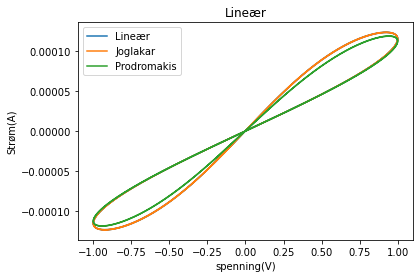

In [20]:
joglakar1=non_lin_memristor(100,16000,3e-9,10e-9,1e-14,1,1,2)
joglakar1.joglakar(10)

prodro1=non_lin_memristor(100,16000,3e-9,10e-9,1e-14,1,1,2)
prodro1.prodromakis(10,1)

lin1=lin_memristor(100,16000,3e-9,10e-9,1e-14,1,1,2)
lin1()
plot([lin1.v, joglakar1.v,prodro1.v],[lin1.i,joglakar1.i,prodro1.i],'spenning(V)','Strøm(A)', 'Lineær', ["Lineær", "Joglakar","Prodromakis"])

### Ved grenseverdier
En slags grenseverdi for $w_0$, ser til å være $w=3.145nm$ ved $v_{max}=1.2V$, dette er verdier den linære modellen sliter med å tolke på en god måte. Det er her Window-funksjonene kommer inn. Du kan se at modellene med window-funksjoner gir mer leselige figurer med mer fornuftige verdier. Her ser du at Prodromakis gir en mer større innretning og gjør det ikke synlig at dette går mot en grenseverdi engang. Joglakar viser mer at det går mot grenseverdiene og gir et større avvik fra de "komfortable" verdiene.

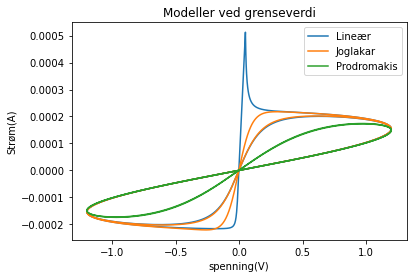

In [24]:
joglakar2=non_lin_memristor(100,16000,3.145e-9,10e-9,1e-14,1.2,1,2)
joglakar2.joglakar(10)

prodro2=non_lin_memristor(100,16000,3.145e-9,10e-9,1e-14,1.2,1,2)
prodro2.prodromakis(10,1)

lin2=lin_memristor(100,16000,3.145e-9,10e-9,1e-14,1.2,1,2)
lin2()
plot([lin2.v, joglakar2.v,prodro2.v],[lin2.i,joglakar2.i,prodro2.i],'spenning(V)','Strøm(A)', 'Modeller ved grenseverdi', ["Lineær", "Joglakar","Prodromakis"])


## Diskusjon

Ettersom memristoren er den første passive kretskomponenter som er funnet siden 1830, har den åpenbare et stort potensiale i analoge datamaskiner og kretser. På grunn av dens egenskaper til å "huske" den forrige motstanden og muligheten til endre på den gir det den et stort potensiale i digitale datamaskiner i fremtiden. 

Memristoren som er modellert etter i dette tilfellet er en suboptimal komponent for dagens datamaskiner etter som den krever mye spenning og lave klokkefrekvenser fra strømkilden. Dette kommer selvfølgelig til å endre seg med utvikling og endring av meterialen men er en begrensning i dette tilfellet.

For modellene ser du at Den linære modellen fungerer bra når det kommer til å vise memristorens egenskaper og er en bra modell for moderate verdier av x. Når det kommer til mer ekstreme verdiene må du bruke en av de ikke-linære modellene for å få en leselig modell.

Med verdiene jeg har valgt for x og j, ser det ut til at innretter Prodromakis-modellen mer mot "komfortable" verdier av x og gjør modellen veldig lik uansett endringer. Joglakar-modellen gir derimot mer avvik fra disse verdiene, men hindrer de større avvikene som kan komme fra den lineære modellen. Hvilken av disse som er mest korrekt i forhold til en memristors reelle målepunkter er vanskelig å si ettersom det er manglende data for å dra en slik konklusjon.

## Oppsummering
Memristorer kan bli en spennende del av det fremtidig teknologilandskapet ved hjelp av teknologiske utviklinger. Memristorene ser i hovedsak ut til å være sett på som en mulig erstatning for det faste minne i datamaskiner og kan gjøre større deler av datamaskinens minne ikke-vilatilt.

I oppgaven har jeg modellert en Williams-memristor, hvor verdiene og formelen er basert på funn fra denne. Den linære modellen fungere fint for å vise komponentens egenskaper og responser til spenning for "komfortable" verdier. Om du vil ha mer ekstreme verdier er den beste løsning å sette inn en window-funksjon som begrenser modellens endring når den går mot veldig høye eller veldig lave verdier og gir modellen en mer realistisk respons.

I oppgaven har jeg testet en linær-modell, en Prodromakis-modell og en Joglakar-modell. Jeg har valgt hensiktsmessige paramtere der det var nødvendig og har kommet frem til at de ikke-lineære modellene trengs for de mer ekstreme tilfelle og burde heller brukes

## Kilder
-  Yasin Oğuz, Mathematical Modeling of Memristors, 2017, https://www.intechopen.com
-  Brian Hayes, The Memristor, 2011, https://www.americanscientist.org
- sudhakaran rathinakumar, Memristor Matlab modeling by analytical method, 2015, https://se.mathworks.com/
- anonym, memristor, 2015, https://www.techtarget.com/
- anonym, What is a Memristor? Types of Memristors and their Applications, https://www.elprocus.com/

